## Assignment 2: $k$ Nearest Neighbor

### Do any four.

I did questions 1, 2, 3, and 6.

In [29]:
%run ./get_data.py

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

Both regression and classification are supervised learning. The difference is regression is used to predict a continuous, numerical variable whereas classficiation is used to predict a categorical label or a probability distirbution over class labels. 

2. What is a confusion table/matrix? What does it help us understand about a model's performance? 

A confusion table is a table that measures how well a classification model is performing. It compares the actual known outcomes with the values predicted by the model. A confusion table provides a visualization to undestand in what cases the model is mislabeling.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the ratio of values correctly predicted by the model out of all predictions made, calculated as (TP+TN)/(TP+TN+FP+FN). However, accuracy can be misleading when the dataset is imbalanced, since a model can achieve high accuracy by simply predicting the majority class. It also does not account for the different costs of false positives and false negatives, which may be important in many real-world applications.

4. What does the root mean squared error quantify about a particular model?

The root mean squared error quantifies the average magnitude of prediction errors for a particular regression model. 

5. What are overfitting and underfitting? 

Overfitting is when a model learns underlying noise in the training data not present in testing data. As a result, an overfit model performs well on training data but poorly on new, unseen test data. Underfitting is when a model is too simple that it doesn't learn sufficient patterns in the data. As a result, an underfit model performs poorly on both train and test data.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

Splitting the data into training and testing sets allows the model to learn patterns on one portion of the data and then be evaluated on unseen data, which provides a more honest estimate of how it will perform in practice. Choosing 𝑘 k by evaluating accuracy or RMSE on the test set helps identify the value that generalizes best rather than just fitting the training data well. This process reduces overfitting and leads to a model that performs more reliably on new, unseen examples.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a class label is simple and easy to interpret, making it useful when a clear decision is required (e.g., approve/deny). However, it does not provide details on the model's confidence, so two predictions with very different certainty levels may appear identical. Reporting a probability distribution provides more information about uncertainty and allows for flexible decision thresholds depending on the application. The downside of probability distributions is that they can be poorly calibrated and may be harder to interpret or act on directly without setting a defined cutoff.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


mines = pd.read_csv("./data/land_mines.csv")
mines.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [31]:
mines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [32]:
mines.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [33]:
mines["mine_type"].value_counts(normalize=True)

mine_type
1    0.210059
2    0.207101
3    0.195266
4    0.195266
5    0.192308
Name: proportion, dtype: float64

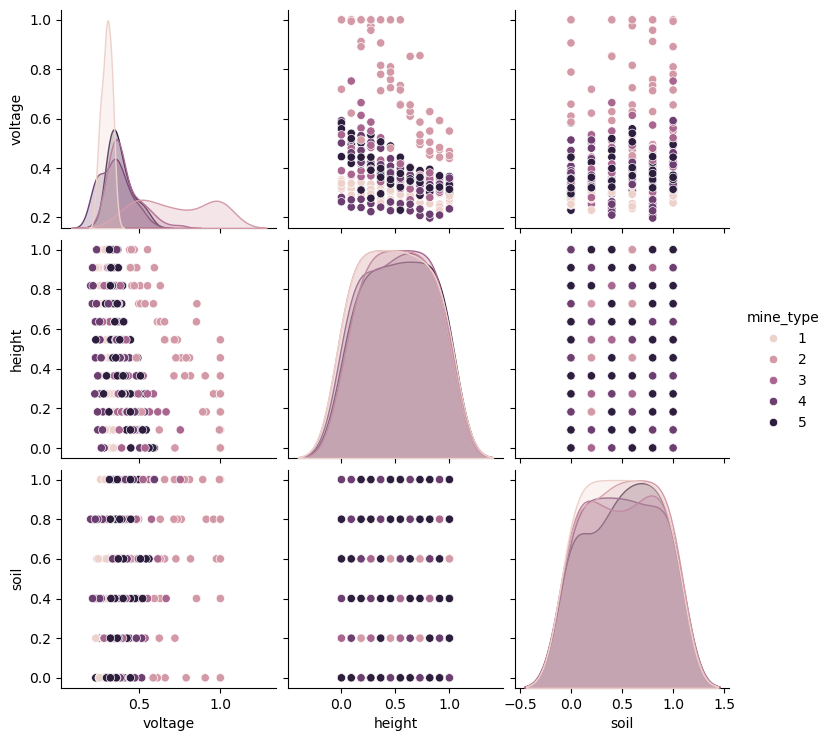

In [34]:
sns.pairplot(data=mines, hue="mine_type", diag_kind="kde")
plt.show()


2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


In [35]:
X = mines[["voltage", "height", "soil"]]
Y = mines["mine_type"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=.5, 
                                                    stratify=Y,
                                                    random_state=100) 


3. Build a $k$-NN classifier. Explain how you select $k$.


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
train_acc = []
test_acc = []

# iterate over potential k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_acc.append(knn.score(X_train_scaled, y_train))
    test_acc.append(knn.score(X_test_scaled, y_test))

best_k = k_values[np.argmax(test_acc)]
print("Best k value: ", best_k)
print("Test Accuracy for best k: ", max(test_acc))

Best k value:  3
Test Accuracy for best k:  0.4911242603550296


I tested multiple values of $k$ (from 1 to 20) and computed the accuracy on the test set for each. The best $k$ is the one that produces the highest test accuracy. From my evaluation I found that the optimal $k$ was $k=3$ with a test accuracy of 0.49.


4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


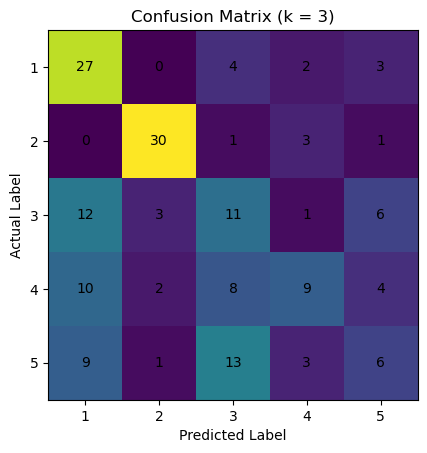

Overall accuracy: 0.4911242603550296


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Train model on best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# predictions
y_pred = knn.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(Y.unique())

plt.figure()
plt.imshow(cm)

plt.title("Confusion Matrix (k = " + str(best_k) +")")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Overall accuracy:", accuracy)

The overall test acccuracy of the model is 0.49 which is better than random chance (0.20). The model performs well when classifying mines of Type 1 and 2. However, the model seems to perform poorer in classifying mines of Type 3, 4, and 5. Notably, the model tends to misclassify Type 3 mines and Type 5 mines with one another, suggesting similarities in voltage, height, and soil between the two types of mines. 

5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In practice, I would advise anybody using this model to use it as a tool to aid in the decision making process, not replace it. I would emphasize the importance of keeping a human in the loop to assess the final call.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


In [38]:
cars = pd.read_csv("./data/USA_cars_datasets.csv")
cars = cars[["price", "year", "mileage"]]

In [39]:
cars.head()
cars.shape

(2499, 3)

In [40]:
cars.isna().sum()

price      0
year       0
mileage    0
dtype: int64

There are no NA's to handle in the dataset.

2. Maxmin normalize `year` and `mileage`.


In [41]:
from sklearn.preprocessing import MinMaxScaler

X = cars[["year", "mileage"]]
Y = cars["price"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  

X_scaled = pd.DataFrame(X_scaled, columns=['year', 'mileage'])
X_scaled

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537
...,...,...
2494,0.978723,0.023193
2495,0.957447,0.033944
2496,0.957447,0.031037
2497,0.957447,0.031983


3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=100) 


4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


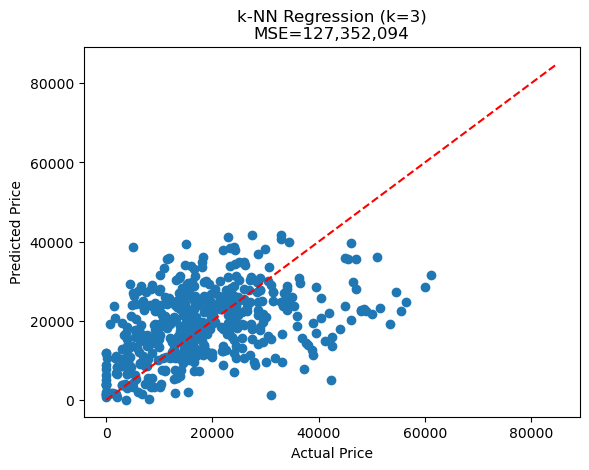

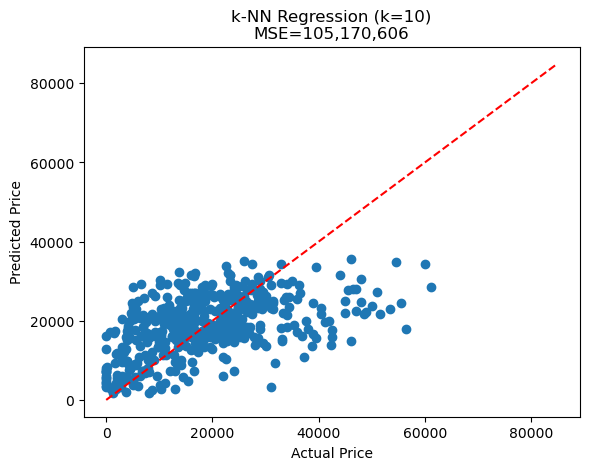

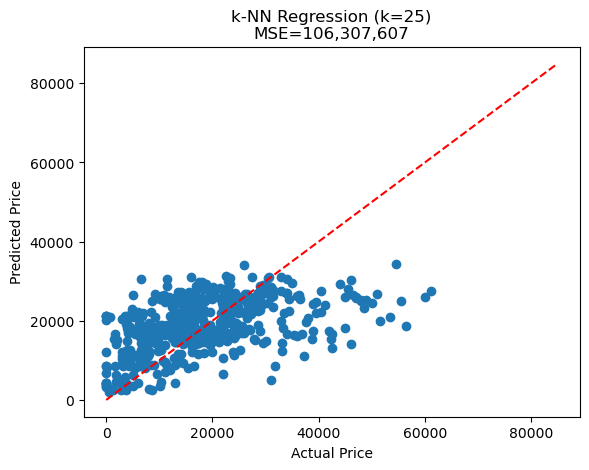

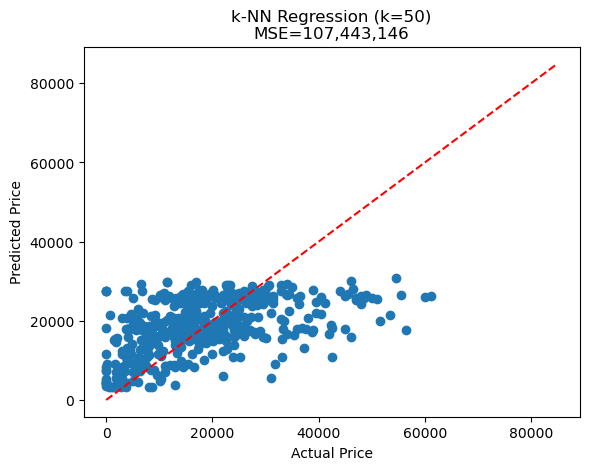

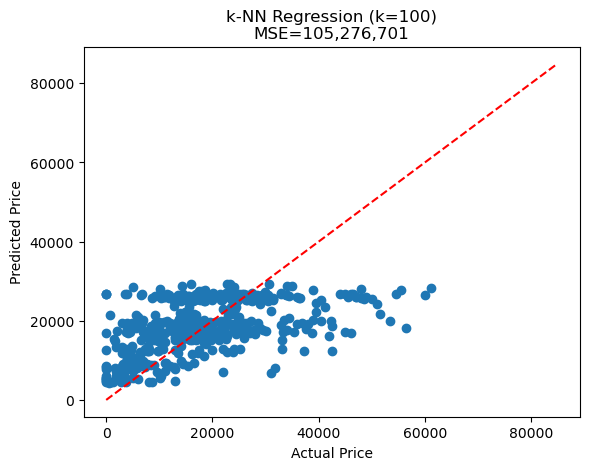

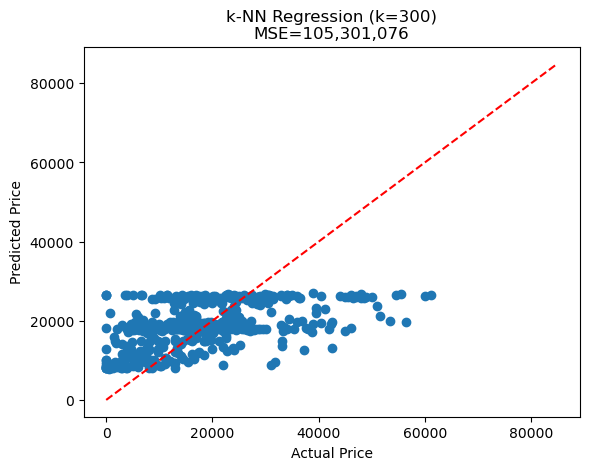

MSE results by k:
k=3: MSE=127,352,094
k=10: MSE=105,170,606
k=25: MSE=106,307,607
k=50: MSE=107,443,146
k=100: MSE=105,276,701
k=300: MSE=105,301,076


In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_values = [3, 10, 25, 50, 100, 300]

mse_results = {}

for k in k_values:
    # train model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # prediction
    y_pred = knn.predict(X_test)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # plot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k})\nMSE={mse:,.0f}")

    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')

    plt.show()

print("MSE results by k:")
for k, mse in mse_results.items():
    print(f"k={k}: MSE={mse:,.0f}")

As $k$ increases, the model’s predictions become more generalized, since each prediction averages over a larger set of neighboring data points. With smaller $k$, the model closely follows localized patterns in the training data, making it more sensitive to noise. However, when $k$ becomes very large, the model over-smooths and averages across too many neighbors, causing predictions to drift toward the overall mean price.

5. Determine the optimal $k$ for these data.


In [44]:

best_k = min(mse_results, key=mse_results.get)
print(f"The optimal k value is {best_k} with an MSE of {mse_results[best_k]:,.2f}")

The optimal k value is 10 with an MSE of 105,170,606.15


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

For small $k$, the model **overfits**, producing scattered predictions that closely follow local noise in the training data. As $k$ increases to a moderate value (around $k = 10$), the predictions align more closely with the 45-degree line, indicating a good balance between bias and variance. However, as $k$ becomes very large, the model begins to **underfit** by averaging across too many neighbors. This causes the predictions to drift toward the mean price, creating a rectangular-shaped band in the plot where predicted values vary little despite wide variation in actual prices.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.


In [45]:
airbnb = pd.read_csv("./data/airbnb_hw.csv")

airbnb = airbnb.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

airbnb.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


In [46]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review Scores Rating  22155 non-null  float64
 1   Price                 30478 non-null  object 
 2   Beds                  30393 non-null  float64
dtypes: float64(2), object(1)
memory usage: 714.5+ KB


In [47]:
airbnb['Price'] = airbnb['Price'].replace(',', '', regex=True).astype(float)

In [48]:
airbnb.shape

(30478, 3)

2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.


In [49]:
# df with missing review values
missing_airbnb = airbnb.loc[airbnb['Review Scores Rating'].isnull()]

3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.


In [50]:
# df with complete review values
airbnb_complete = airbnb.dropna(axis=0, how='any')

4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)


In [51]:
X = airbnb_complete[['Price', 'Beds']]
Y = airbnb_complete['Review Scores Rating']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=100
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
k_values = [3, 5, 10, 25, 50, 100]
sse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    sse = np.sum((y_test - y_pred) ** 2)
    sse_results[k] = sse

# find best k
best_k = min(sse_results, key=sse_results.get)

print("SSE results by k:")
for k, sse in sse_results.items():
    print(f"k={k}: SSE={sse:.2f}")

print(f"\nOptimal k is {best_k} with SSE = {sse_results[best_k]:.2f}")

SSE results by k:
k=3: SSE=453366.33
k=5: SSE=415350.28
k=10: SSE=379850.85
k=25: SSE=354380.08
k=50: SSE=343821.24
k=100: SSE=337843.61

Optimal k is 100 with SSE = 337843.61


I chose $k$ by testing reasonable $k$ values of 3, 5, 10, 25, 50, 100 and choosing the value that resulted in the lowest SSE.

5. Predict the missing ratings. 


In [54]:
X_missing = missing_airbnb[['Price', 'Beds']].copy()
X_missing.isna().sum() # checking which columns have missing values

Price     0
Beds     41
dtype: int64

In [55]:
X_missing['Beds'] = X_missing['Beds'].fillna(airbnb_complete['Beds'].median()) # impute missing "Beds" values with median

# scale missing data with scalar fitted on training data
X_missing_scaled = scaler.transform(X_missing) 

# predict missing review scores
imputed_scores = knn.predict(X_missing_scaled)

# write back review scores to missing_airbnb dataframe
missing_airbnb.loc[:, 'Review Scores Rating'] = imputed_scores

missing_airbnb.head()

,Review Scores Rating,Price,Beds
0,94.18,145.0,1.0
1,87.91,37.0,1.0
2,85.84,28.0,1.0
3,88.38,199.0,3.0
13,92.61,68.0,1.0


6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

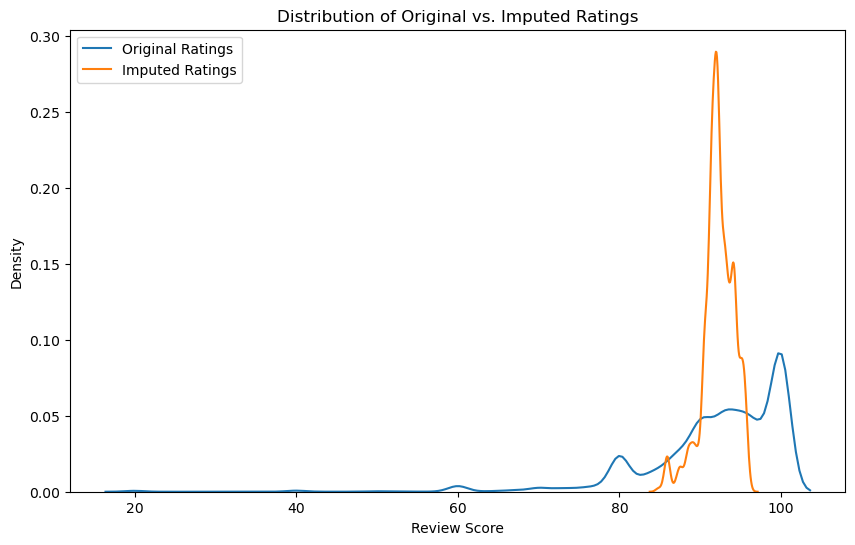

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(airbnb_complete['Review Scores Rating'], label='Original Ratings')
sns.kdeplot(missing_airbnb['Review Scores Rating'], label='Imputed Ratings')
plt.title('Distribution of Original vs. Imputed Ratings')
plt.xlabel('Review Score')
plt.legend()
plt.show()

The KDE plot shows that the original ratings have a wider spread and more variability, extending further into lower values, while the imputed ratings are tightly clustered around the low-to-mid 90s with a sharper peak. The predicted missing ratings appear much more concentrated and smooth, indicating lower variance compared to the original data. One reason for this stems from our imputed calculation of missing 'Beds' values by using the median. This would minimize the variance in the 'Beds' variable.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)